In [2]:
import sys
import logging
from uuid import UUID

import emission.core.get_database as edb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as pydt
import emission.storage.timeseries.abstract_timeseries as esta
import emission.storage.timeseries.timequery as estt

logging.getLogger().setLevel(logging.DEBUG)
logging.debug(sys.path)

iphone_ids = [UUID("079e0f1a-c440-3d7c-b0e7-de160f748e35"), UUID("c76a0487-7e5a-3b17-a449-47be666b36f6"), 
              UUID("c528bcd2-a88b-3e82-be62-ef4f2396967a"), UUID("95e70727-a04e-3e33-b7fe-34ab19194f8b")]
android_ids = [UUID("e471711e-bd14-3dbe-80b6-9c7d92ecc296"), UUID("fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7"),
               UUID("86842c35-da28-32ed-a90e-2da6663c5c73"), UUID("3bc0f91f-7660-34a2-b005-5c399598a369")]

In [3]:
list(edb.get_timeseries_db().find({"metadata.key": "config/sensor_config", "data.battery_status": {"$exists": True}}).sort("metadata.write_ts").limit(10))

[{u'_id': ObjectId('56fadecd88f66341cb3618c9'),
  u'data': {u'android_health': u'GOOD',
   u'android_plugged': u'USB',
   u'android_technology': u'Li-ion',
   u'android_temperature': 226,
   u'android_voltage': 226,
   u'battery_level_pct': 100,
   u'battery_status': 5},
  u'metadata': {u'key': u'config/sensor_config',
   u'platform': u'android',
   u'read_ts': 1459281599.629,
   u'time_zone': u'America/Los_Angeles',
   u'type': u'sensor-data',
   u'write_fmt_time': u'2016-03-29T11:56:24.694000-07:00',
   u'write_local_dt': datetime.datetime(2016, 3, 29, 11, 56, 24, 694000),
   u'write_ts': 1459277784.694},
  u'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')},
 {u'_id': ObjectId('56faecf288f66323bcc68ee9'),
  u'data': {u'android_health': u'GOOD',
   u'android_plugged': u'USB',
   u'android_technology': u'Li-ion',
   u'android_temperature': 197,
   u'android_voltage': 197,
   u'battery_level_pct': 100,
   u'battery_status': 2},
  u'metadata': {u'key': u'config/sensor_config',
   

In [4]:
#type: list of emission.storage.timeseries.builtin_timeseries.BuiltinTimeSeries
iphone_ts = map(lambda u: esta.TimeSeries.get_time_series(u), iphone_ids)
android_ts = map(lambda u: esta.TimeSeries.get_time_series(u), android_ids)

#time query specification
dt1 = pydt.datetime(2016, 7, 17, 11, 0) #datetime.datetime(2016, 6, 24, 22, 0)
dt2 = pydt.datetime(2016, 7, 18, 23, 0)

ts1 = int(dt1.strftime("%s"))
ts2 = int(dt2.strftime("%s"))

time_range = estt.TimeQuery("metadata.write_ts", ts1, ts2)

#BuiltinTimeSeries.get_data_df(key, time_query = None, geo_query = None, extra_query_list=None) 
#type: list of DataFrame objects (regarding state info)
iphone_state_df_list = map(lambda t:t.get_data_df("statemachine/transition", time_range), iphone_ts)
android_state_df_list = map(lambda t:t.get_data_df("statemachine/transition", time_range), android_ts)

iphone_battery_df_list = map(lambda t:t.get_data_df("background/battery", time_range), iphone_ts)
android_battery_df_list = map(lambda t:t.get_data_df("background/battery", time_range), android_ts)

In [6]:
android_test = android_battery_df_list[0]
android_test[['fmt_time', 'battery_level_pct', 'battery_status']]
android_test

_id android_health android_plugged android_technology  \
0  578bcaf1abbf384cade57441           GOOD              AC             Li-ion   
1  578c0387abbf384cade63842           GOOD         UNKNOWN             Li-ion   
2  578c3ba3abbf384cade6bf4a           GOOD         UNKNOWN             Li-ion   
3  578c9069abbf384cade7995d           GOOD         UNKNOWN             Li-ion   
4  578db977abbf384cade9b297           GOOD         UNKNOWN             Li-ion   
5  578dba89abbf384cadeb306c           GOOD         UNKNOWN             Li-ion   

   android_temperature  android_voltage  battery_level_pct  battery_status  \
0                  275              275                100               3   
1                  285              285                 93               1   
2                  285              285                 84               1   
3                  283              283                 67               1   
4                  285              285                 39               1   
5                  287              287                  9               1   

                           fmt_time  \
0  2016-07-17T11:14:04.873000-07:00   
1  2016-07-17T13:18:50.024000-07:00   
2  2016-07-17T15:15:45.527000-07:00   
3  2016-07-17T19:15:12.150000-07:00   
4  2016-07-18T01:16:49.487000-07:00   
5  2016-07-18T07:18:11.419000-07:00   

                                            local_dt  metadata_write_ts  \
0  {u'hour': 11, u'month': 7, u'second': 4, u'wee...       1.468779e+09   
1  {u'hour': 13, u'month': 7, u'second': 50, u'we...       1.468787e+09   
2  {u'hour': 15, u'month': 7, u'second': 45, u'we...       1.468794e+09   
3  {u'hour': 19, u'month': 7, u'second': 12, u'we...       1.468808e+09   
4  {u'hour': 1, u'month': 7, u'second': 49, u'wee...       1.468830e+09   
5  {u'hour': 7, u'month': 7, u'second': 11, u'wee...       1.468851e+09   

             ts  
0  1.468779e+09  
1  1.468787e+09  
2  1.468794e+09  
3  1.468808e+09  
4  1.468830e+09  
5  1.468851e+09

In [7]:
android_test = iphone_battery_df_list[1]
android_test[['fmt_time', 'battery_level_pct', 'battery_status']]

fmt_time  battery_level_pct  battery_status
0   2016-07-17T11:03:20.186569-07:00              100.0               3
1   2016-07-17T11:03:20.262720-07:00              100.0               3
2   2016-07-17T11:03:20.406244-07:00              100.0               3
3   2016-07-17T11:03:20.466670-07:00              100.0               3
4   2016-07-17T11:03:20.555844-07:00              100.0               3
5   2016-07-17T12:00:02.895527-07:00              100.0               1
6   2016-07-17T12:00:08.603795-07:00              100.0               1
7   2016-07-17T12:00:12.145864-07:00              100.0               1
8   2016-07-17T12:00:25.712336-07:00              100.0               1
9   2016-07-17T13:00:03.664424-07:00               96.0               1
10  2016-07-17T13:00:07.312127-07:00               96.0               1
11  2016-07-17T13:00:10.481533-07:00               96.0               1
12  2016-07-17T13:00:24.024181-07:00               96.0               1
13  2016-07-17T14:00:02.902534-07:00               92.0               1
14  2016-07-17T14:00:06.530538-07:00               92.0               1
15  2016-07-17T14:00:12.209151-07:00               92.0               1
16  2016-07-17T14:00:27.757034-07:00               92.0               1
17  2016-07-17T15:00:03.620002-07:00               88.0               1
18  2016-07-17T15:00:11.594673-07:00               88.0               1
19  2016-07-17T15:00:23.699694-07:00               88.0               1
20  2016-07-17T15:00:24.546738-07:00               88.0               1
21  2016-07-17T16:00:03.591360-07:00               83.0               1
22  2016-07-17T16:00:07.723797-07:00               83.0               1
23  2016-07-17T16:00:11.421981-07:00               83.0               1
24  2016-07-17T16:00:27.733933-07:00               83.0               1
25  2016-07-17T17:00:02.916790-07:00               79.0               1
26  2016-07-17T17:00:05.901388-07:00               79.0               1
27  2016-07-17T17:00:10.174423-07:00               79.0               1
28  2016-07-17T17:00:22.530658-07:00               79.0               1
29  2016-07-17T18:12:26.071783-07:00               74.0               1
..                               ...                ...             ...
61  2016-07-18T03:00:16.941208-07:00               37.0               1
62  2016-07-18T03:00:21.477918-07:00               37.0               1
63  2016-07-18T04:00:03.772565-07:00               32.0               1
64  2016-07-18T04:00:08.026808-07:00               32.0               1
65  2016-07-18T04:00:10.598133-07:00               32.0               1
66  2016-07-18T04:00:27.249259-07:00               32.0               1
67  2016-07-18T05:00:11.137130-07:00               28.0               1
68  2016-07-18T05:00:15.809644-07:00               28.0               1
69  2016-07-18T06:00:02.333445-07:00               24.0               1
70  2016-07-18T06:00:09.231354-07:00               24.0               1
71  2016-07-18T06:00:31.556511-07:00               24.0               1
72  2016-07-18T07:00:02.981282-07:00               20.0               1
73  2016-07-18T07:00:14.780560-07:00               20.0               1
74  2016-07-18T07:00:17.087083-07:00               20.0               1
75  2016-07-18T07:00:30.196548-07:00               20.0               1
76  2016-07-18T08:00:07.062048-07:00               16.0               1
77  2016-07-18T08:00:10.643679-07:00               16.0               1
78  2016-07-18T08:00:30.529929-07:00               16.0               1
79  2016-07-18T09:00:03.720620-07:00               11.0               1
80  2016-07-18T09:00:07.218165-07:00               11.0               1
81  2016-07-18T09:00:10.905392-07:00               11.0               1
82  2016-07-18T09:00:26.207423-07:00               11.0               1
83  2016-07-18T10:00:04.476150-07:00                7.0               1
84  2016-07-18T10:00:13.239211-07:00                7.0             

In [8]:
def get_ranges_df(battery_df, state_df):
    #the experiment runs until the battery drains completely
    #so start_ts should be the last time it was reported 100% battery level
    full_df = battery_df[battery_df.battery_level_pct == 100]
    last_full_ts = full_df.iloc[-1].ts 
    
    start_ts = last_full_ts
    end_ts = battery_df.iloc[-1].ts
    
    #find start_ts & end_ts for the period when battery_status=1=discharging
    #discharging_df = battery_df[battery_df.battery_status == 1]
    #discharging_df.reset_index(inplace=True)
    #start_ts = discharging_df.iloc[0].ts
    #end_ts = discharging_df.iloc[-1].ts
    
    ranges_df = pd.DataFrame({'start_ts': [start_ts], 'end_ts': [end_ts]})
    return ranges_df

In [9]:
def get_ranges_df_list(battery_df_list, state_df_list):
    ranges_df_list = []
    length = len(battery_df_list)
    for i in range(0, length):
        ranges_df_list.append(get_ranges_df(battery_df_list[i], state_df_list[i]))
    return ranges_df_list

In [10]:
iphone_ranges_df_list = get_ranges_df_list(iphone_battery_df_list, iphone_state_df_list)

#iphone_concat_ranges_df = pd.concat([iphone_ranges_df_list[0], iphone_ranges_df_list[1], iphone_ranges_df_list[2], iphone_ranges_df_list[3]])
#print iphone_concat_ranges_df

iphone_ranges_df = pd.DataFrame()
for df in iphone_ranges_df_list:
    iphone_ranges_df = iphone_ranges_df.append(df)

ts_to_dt = lambda t: pydt.datetime.fromtimestamp(t)
iphone_ranges_df['start_dt'] = iphone_ranges_df.start_ts.apply(ts_to_dt)
iphone_ranges_df['end_dt'] = iphone_ranges_df.end_ts.apply(ts_to_dt)

iphone_ranges_df

end_ts      start_ts                   start_dt  \
0  1.468865e+09  1.468782e+09 2016-07-17 12:00:25.139976   
0  1.468865e+09  1.468782e+09 2016-07-17 12:00:25.712336   
0  1.468865e+09  1.468779e+09 2016-07-17 11:01:51.175624   
0  1.468858e+09  1.468782e+09 2016-07-17 12:00:23.888400   

                      end_dt  
0 2016-07-18 11:00:27.966900  
0 2016-07-18 11:00:23.981485  
0 2016-07-18 11:00:11.815627  
0 2016-07-18 09:00:17.721428

In [11]:
android_ranges_df_list = get_ranges_df_list(android_battery_df_list, android_state_df_list)

#android_concat_ranges_df = pd.concat([ranges_df_list[0], ranges_df_list[1], ranges_df_list[2], ranges_df_list[3]])
#android_concat_ranges_df

android_ranges_df = pd.DataFrame()
for df in android_ranges_df_list:
    android_ranges_df = android_ranges_df.append(df)
    
ts_to_dt = lambda t: pydt.datetime.fromtimestamp(t)
android_ranges_df['start_dt'] = android_ranges_df.start_ts.apply(ts_to_dt)
android_ranges_df['end_dt'] = android_ranges_df.end_ts.apply(ts_to_dt)
    
android_ranges_df

end_ts      start_ts                start_dt                  end_dt
0  1.468851e+09  1.468779e+09 2016-07-17 11:14:04.873 2016-07-18 07:18:11.419
0  1.468860e+09  1.468779e+09 2016-07-17 11:12:33.859 2016-07-18 09:41:21.346
0  1.468851e+09  1.468779e+09 2016-07-17 11:16:54.830 2016-07-18 07:11:31.007
0  1.468852e+09  1.468779e+09 2016-07-17 11:15:34.992 2016-07-18 07:34:48.462

In [12]:
iphone_start_ts = iphone_ranges_df.start_ts.max() 
iphone_end_ts = iphone_ranges_df.end_ts.min() + 60*60
i_t1 = pydt.datetime.fromtimestamp(iphone_start_ts)
i_t2 = pydt.datetime.fromtimestamp(iphone_end_ts)
print 'iphone_start_ts=' + str(i_t1) + '\n' + 'iphone_end_ts=' + str(i_t2)
print  (iphone_end_ts-iphone_start_ts)/3600.0

android_start_ts = android_ranges_df.start_ts.min() 
android_end_ts = android_ranges_df.end_ts.max() + 60*60
a_t1 = pydt.datetime.fromtimestamp(android_start_ts)
a_t2 = pydt.datetime.fromtimestamp(android_end_ts)
print 'android_start_ts=' + str(a_t1) + '\n' + 'android_end_ts=' + str(a_t2)
print  (android_end_ts-android_start_ts)/3600.0

iphone_start_ts=2016-07-17 12:00:25.712336
iphone_end_ts=2016-07-18 10:00:17.721428
21.9977803033
android_start_ts=2016-07-17 11:12:33.859000
android_end_ts=2016-07-18 10:41:21.346000
23.4798575


In [13]:
import numpy as np

iphone_xnew = np.arange(iphone_start_ts, iphone_end_ts, 15 * 60) # 15 minutes
print len(iphone_xnew)

android_xnew = np.arange(android_start_ts, android_end_ts, 15 * 60) # 15 minutes
print type(android_xnew)

88
<type 'numpy.ndarray'>


In [14]:
import scipy.interpolate as spi
import numpy as np

def get_interpolated(x, y, xnew):
    # fn = spi.interp1d(x=x, y=y, bounds_error=False, fill_value=y.iloc[-1])
    fn = spi.interp1d(x=x, y=y, bounds_error=False)
    #This class returns a function whose call method uses interpolation to find the value of new points.
    return fn(xnew)

In [15]:
def get_interpolated_df(sensor_df, xnew):
    local_dt_new = map(pydt.datetime.fromtimestamp, xnew)
    fmt_time_new = map(lambda dt: dt.isoformat(), local_dt_new)
    #date.isoformat() Return a string representing the date in ISO 8601 format, ‘YYYY-MM-DD’. 
    # -For example, date(2002, 12, 4).isoformat() == '2002-12-04'.
    interpolated_series = get_interpolated(sensor_df.ts, sensor_df.battery_level_pct, xnew)
    # print "interpolated_series = %s" % interpolated_series
    interpolated_df = pd.DataFrame(data={'ts': xnew, 'metadata_write_ts': xnew, 'local_dt': local_dt_new, 'fmt_time': fmt_time_new, 'battery_level_pct': interpolated_series})
    return interpolated_df

In [16]:
iphone_battery_interp_df_list = map(lambda df: get_interpolated_df(df, iphone_xnew), iphone_battery_df_list)
android_battery_interp_df_list = map(lambda df: get_interpolated_df(df, android_xnew), android_battery_df_list)

In [17]:
label = ['1hr', '1hr', '1hr', '1hr']
style = ['ob', 'og', 'or', 'oc']
title = "TrackingOn_Stationary_HAFS "

ts_to_dt = lambda t: pydt.datetime.fromtimestamp(t)

About to plot 0
About to plot 1
About to plot 2
About to plot 3


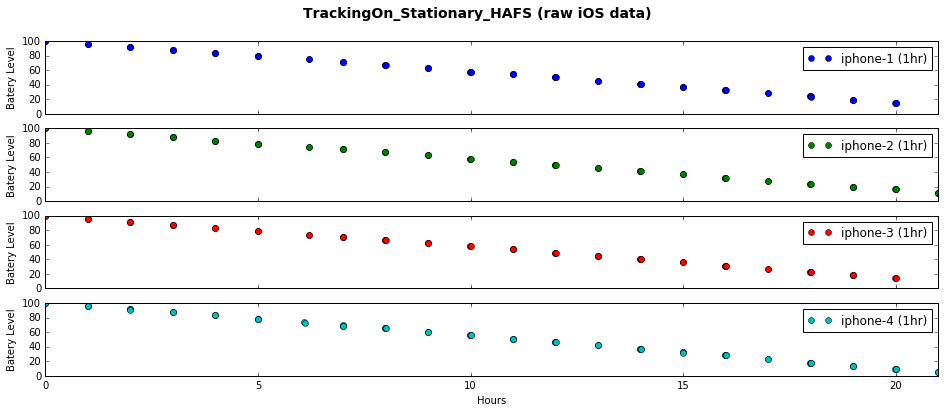

In [18]:
#iOS: No interplation on battery data
(afig, aaxes2d) = plt.subplots(ncols=1, nrows=4, sharex=True, sharey=True, figsize=(16,6))
aaxes = aaxes2d.flatten()

afig.suptitle(title + '(raw iOS data)', fontsize=14, fontweight='bold')

for i, df in enumerate(iphone_battery_df_list):
    print "About to plot %d" % i
    df['hr'] = (df.ts-iphone_start_ts)/3600.0
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=aaxes[i], label="iphone-%s (1hr)" % (i+1))
    aaxes[i].set_xlabel('Hours')
    aaxes[i].set_ylabel('Batery Level')
    aaxes[i].set_xlim(left=0)
    #plt.xticks(np.arange(0, max(df['hr'])+2, 2.0))
    
#afig.savefig('scatter_Apr_2-3_iOS.png')

About to plot 0
About to plot 1
About to plot 2
About to plot 3
ios 0: slope=-4.29406386676 std_err=0.00645412711193
ios 1: slope=-4.2422841235 std_err=0.00503296428799
ios 2: slope=-4.28303197783 std_err=0.00926649036316
ios 3: slope=-4.56014579245 std_err=0.00754414503836
-4.34488144013


0.12577035870045114

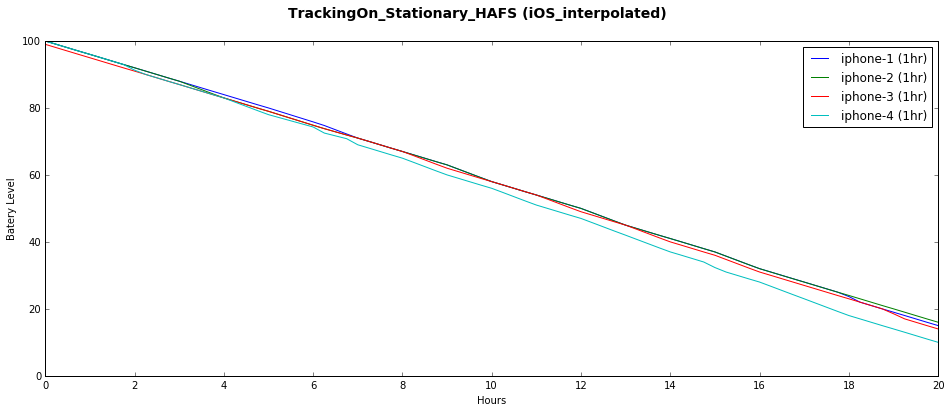

In [19]:
#iOS: With interplation on battery data 
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d
ifig.suptitle(title + '(iOS_interpolated)', fontsize=14, fontweight='bold')

for i, df in enumerate(iphone_battery_interp_df_list):
    print "About to plot %d" % i
    df['hr'] = (df.ts-iphone_start_ts)/3600.0
    df.plot(x='hr', y='battery_level_pct', ax=iaxes, xlim=(0, 7), label="iphone-%s (1hr)" % (i+1))
    iaxes.set_xlabel('Hours')
    iaxes.set_ylabel('Batery Level')
    plt.xticks(np.arange(0, max(df['hr']), 2.0))

#ifig.savefig('interp_Apr_2-3_iOS.png') 


total=[]
from scipy import stats
for i, df in enumerate(iphone_battery_interp_df_list):
    notnull = df.battery_level_pct.notnull()
    slope, intercept, r_value, p_value, std_err = stats.linregress(df.hr[notnull], df.battery_level_pct[notnull])
    print "ios %d: " % i  + "slope="+str(slope) + " std_err="+str(std_err)
    total.append(slope)

print sum(total)/4
np.std(total)

About to plot 0
About to plot 1
About to plot 2
About to plot 3
About to plot 0
About to plot 1
About to plot 2
About to plot 3


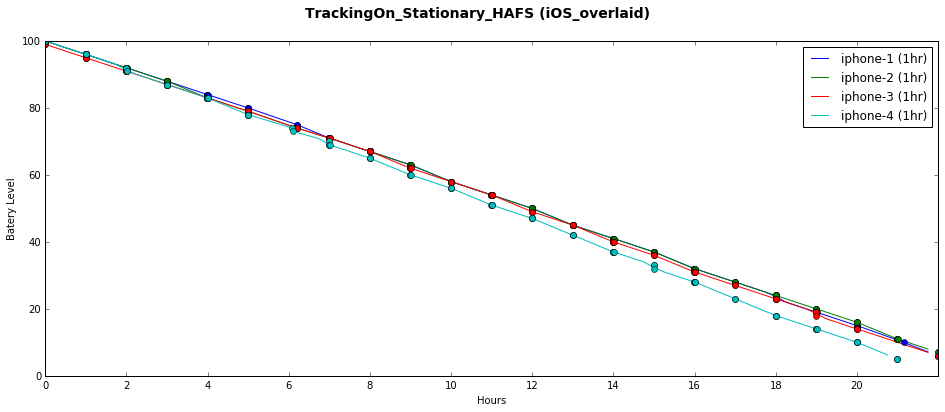

In [20]:
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d
ifig.suptitle(title + '(iOS_overlaid)', fontsize=14, fontweight='bold')

for i, df in enumerate(iphone_battery_interp_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', ax=iaxes, xlim=(0, 22), label="iphone-%s (1hr)" % (i+1), legend=True)

for i, df in enumerate(iphone_battery_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=iaxes, xlim=(0, 22), legend=False)
    iaxes.set_xlabel('Hours')
    iaxes.set_ylabel('Batery Level')
    plt.xticks(np.arange(0, 22, 2.0))

    
#ifig.savefig('overlaid_Apr_2-3_iOS.png')  

In [21]:
def display_per_state_drain(drain_df_map, ground_truth_df, regime_map):
    drain_df_keys = sorted(drain_df_map.keys())
    fig, axes = plt.subplots(nrows=1, ncols=len(drain_df_keys), figsize=(15,3), sharey=True)
    for i, key in enumerate(drain_df_keys):
        print "displaying %d, %s (%s)" % (i, key, regime_map[key])
        drain_df = drain_df_map[key]
        state_diff_df = get_state_diff_df(drain_df, ground_truth_df)
        state_diff_df.boxplot(column='rate', by='state', ax=axes[i], grid=True)
        axes[i].set_title("%s (%s)" % (key, regime_map[key]))
        # print state_diff_df.groupby('state').rate.describe()

    for ax in axes:
        ax.minorticks_on()
        ax.grid(which='both', color='purple')

    # We set the label on only the first graph because we have shared Y
    axes[0].set_ylabel("battery % drain/hr")
    # By default, pandas adds a stupid label like "Boxplot grouped by state".
    # This overlaps with part of the per graph title and looks ugly. And 
    for t in fig.texts:
        t.set_text("")

    return (fig, axes)


In [22]:
iphone_ts = map(lambda u: esta.TimeSeries.get_time_series(u), iphone_ids)
android_ts = map(lambda u: esta.TimeSeries.get_time_series(u), android_ids)

iphone_time_range = estt.TimeQuery("metadata.write_ts", iphone_start_ts, iphone_end_ts)
android_time_range = estt.TimeQuery("metadata.write_ts", android_start_ts, android_end_ts)

iphone_battery_df_discharge_list = map(lambda t:t.get_data_df("background/battery", iphone_time_range), iphone_ts)
android_battery_df_discharge_list = map(lambda t:t.get_data_df("background/battery", android_time_range), android_ts)

<class 'pandas.core.series.Series'>
[  1   0   0  -2  -6  -8 -19 -29 -29]
6
6
   delta_b   delta_t     slope            ts                fmt_time   b
3       -2  0.800316 -2.499014  1.468782e+09 2016-07-17 12:03:08.240  98
4       -6  1.279327 -4.689964  1.468787e+09 2016-07-17 13:19:53.819  92
5       -8  2.029035 -3.942761  1.468794e+09 2016-07-17 15:21:38.345  84
6      -19  4.148925 -4.579500  1.468809e+09 2016-07-17 19:30:34.475  65
7      -29  6.136112 -4.726120  1.468831e+09 2016-07-18 01:38:44.478  36
8      -29  5.934440 -4.886729  1.468852e+09 2016-07-18 07:34:48.462   7


/Users/yawen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


count    6.000000
mean    -4.220681
std      0.904372
min     -4.886729
25%     -4.717081
50%     -4.634732
75%     -4.101946
max     -2.499014
Name: slope, dtype: float64

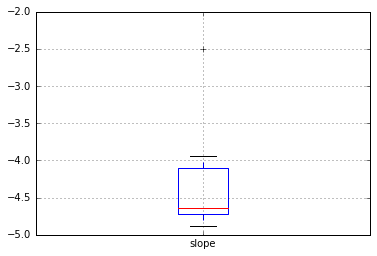

In [23]:
import numpy as np
itest = android_battery_df_discharge_list[3]
#print itest.battery_level_pct
print type(itest.battery_level_pct) #<class 'pandas.core.series.Series'>
b = itest.battery_level_pct
delta_b = np.diff(itest.battery_level_pct)
delta_b = np.insert(delta_b, 0, 1)
#print delta_b
ts = itest.metadata_write_ts

rate_df = pd.DataFrame({'delta_b':delta_b, 'ts':ts, 'b':b})
rate_df = rate_df[rate_df.delta_b!=0]
print delta_b
delta_b = rate_df.delta_b[1:]
delta_t = np.diff(rate_df.ts)/3600 #convert from seconds to hrs 
print len(delta_b)
print len(delta_t)
slope_df = pd.DataFrame({'delta_b':delta_b, 'delta_t':delta_t})
slope_df['slope'] = delta_b/delta_t
slope_df['ts'] = rate_df.ts[1:]
slope_df['fmt_time'] = slope_df.ts.apply(ts_to_dt)
slope_df['b'] = rate_df.b[1:]

#remove outliners 
slope_df = slope_df[slope_df.slope>-10 ]
slope_df = slope_df[slope_df.slope<-2 ]

print slope_df

#_, breaks=np.histogram(df.MAT,bins=1)
#(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
#iaxes = iaxes2d
ax = slope_df.boxplot(column='slope')
slope_df.slope.describe()

[[ 1.          0.99990317  0.99990236         nan]
 [ 0.99990317  1.          0.99984821         nan]
 [ 0.99990236  0.99984821  1.                 nan]
 [        nan         nan         nan         nan]]


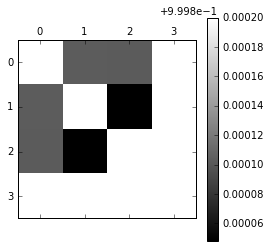

In [24]:
#iOS
#correlation analysis 
#generate list of iphone battery series 
iphone_battery_series_list = map(lambda b: b.battery_level_pct, iphone_battery_interp_df_list)
print np.corrcoef(iphone_battery_series_list)
plt.matshow(np.corrcoef(iphone_battery_series_list), cmap=plt.cm.gray)
plt.colorbar()

In [67]:
#iphone data
for i, phone in enumerate(iphone_battery_df_discharge_list):
    batt = phone
    x = batt.metadata_write_ts
    y = batt.battery_level_pct

    p1 = np.polyfit(x,y,1)
    p2 = np.polyfit(x,y,2) # insufficient degree to include sqrt

    yfit1 = np.polyval(p1,x)
    yfit2 = np.polyval(p2,x)

    #plt.plot(x,y, label='data')
    #plt.plot(x,yfit1, label='fit')
    #plt.plot(x,yfit1-y, label='var')
    #plt.plot(x,yfit2, label='fit')
    #plt.plot(x,yfit2-y, label='var')

    
    print 'phone ' + str(i)
    print 'degree1: sum = ' + str(sum(abs(yfit1-y))) + ' avg = ' + str(sum(abs(yfit1-y))/len(y))
    print 'degree2: sum = ' + str(sum(abs(yfit2-y))) + ' avg = ' + str(sum(abs(yfit2-y))/len(y))

    print 'degree1: RMSE = ' + str(np.mean((y - yfit1) ** 2)**0.5)
    print 'degree2: RMSE = ' + str(np.mean((y - yfit2) ** 2)**0.5)
    print 

phone 0
degree1: sum = 24.5551436874 avg = 0.314809534454
degree2: sum = 18.6178963184 avg = 0.238690978441
degree1: RMSE = 0.37711048065
degree2: RMSE = 0.275305141145

phone 1
degree1: sum = 21.9586078646 avg = 0.285176725514
degree2: sum = 20.7842102051 avg = 0.269924807858
degree1: RMSE = 0.337272628766
degree2: RMSE = 0.318780709926

phone 2
degree1: sum = 34.1974998217 avg = 0.474965275301
degree2: sum = 22.8286838531 avg = 0.317065053516
degree1: RMSE = 0.569664338702
degree2: RMSE = 0.41075722165

phone 3
degree1: sum = 25.6632705778 avg = 0.346800953754
degree2: sum = 22.8537716866 avg = 0.308834752521
degree1: RMSE = 0.429902546252
degree2: RMSE = 0.36666102153



In [68]:
#android data
for i, phone in enumerate(android_battery_df_discharge_list):
    batt = phone
    x = batt.metadata_write_ts
    y = batt.battery_level_pct

    p1 = np.polyfit(x,y,1)
    p2 = np.polyfit(x,y,2) # insufficient degree to include sqrt

    yfit1 = np.polyval(p1,x)
    yfit2 = np.polyval(p2,x)

    #plt.plot(x,y, label='data')
    #plt.plot(x,yfit1, label='fit')
    #plt.plot(x,yfit1-y, label='var')
    #plt.plot(x,yfit2, label='fit')
    #plt.plot(x,yfit2-y, label='var')

    
    print 'phone ' + str(i)
    print 'degree1: sum = ' + str(sum(abs(yfit1-y))) + ' avg = ' + str(sum(abs(yfit1-y))/len(y))
    print 'degree2: sum = ' + str(sum(abs(yfit2-y))) + ' avg = ' + str(sum(abs(yfit2-y))/len(y))

    print 'degree1: RMSE = ' + str(np.mean((y - yfit1) ** 2)**0.5)
    print 'degree2: RMSE = ' + str(np.mean((y - yfit2) ** 2)**0.5)
    print 

phone 0
degree1: sum = 6.96140524955 avg = 1.16023420826
degree2: sum = 1.74069499969 avg = 0.290115833282
degree1: RMSE = 1.29929537095
degree2: RMSE = 0.392820044804

phone 1
degree1: sum = 8.02791803051 avg = 1.14684543293
degree2: sum = 1.07771587372 avg = 0.153959410531
degree1: RMSE = 1.2639092635
degree2: RMSE = 0.196099075514

phone 2
degree1: sum = 9.70882073999 avg = 0.882620067272
degree2: sum = 3.9533996582 avg = 0.359399968928
degree1: RMSE = 0.986047380195
degree2: RMSE = 0.431303867713

phone 3
degree1: sum = 9.32438862254 avg = 1.03604318028
degree2: sum = 3.6945772171 avg = 0.410508579678
degree1: RMSE = 1.12272760593
degree2: RMSE = 0.464603111453



4
About to plot 0
About to plot 1
About to plot 2
About to plot 3


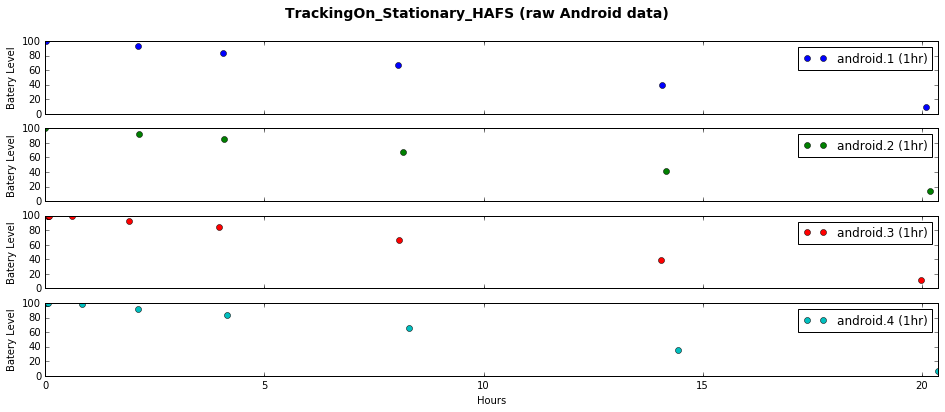

In [25]:
#Android: No interplation on battery data 
print len(android_battery_df_list)
(afig, aaxes2d) = plt.subplots(ncols=1, nrows=4, sharex=True, sharey=True, figsize=(16,6))
aaxes = aaxes2d.flatten()

afig.suptitle(title + '(raw Android data)', fontsize=14, fontweight='bold')

for i, df in enumerate(android_battery_df_list):
    print "About to plot %d" % i
    df['dt'] = df.ts.apply(ts_to_dt)
    df['hr'] = (df.ts-android_start_ts)/3600.0
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=aaxes[i], label="android.%s (1hr)" % (i+1))
    aaxes[i].set_xlabel('Hours')
    aaxes[i].set_ylabel('Batery Level')
    aaxes[i].set_xlim(left=0)
    #plt.xticks(np.arange(0, max(df['hr'])+2, 1))
    
#afig.savefig('scatter_Apr_2-3_Android.png')

About to plot 0
About to plot 1
About to plot 2
About to plot 3
android 0: slope=-4.58744224466 std_err=0.0170617795163
android 1: slope=-4.33099226623 std_err=0.0161637522142
android 2: slope=-4.54892893171 std_err=0.0127339274363
android 3: slope=-4.65398091044 std_err=0.012910588696
-4.53033608826


0.12107106214884952

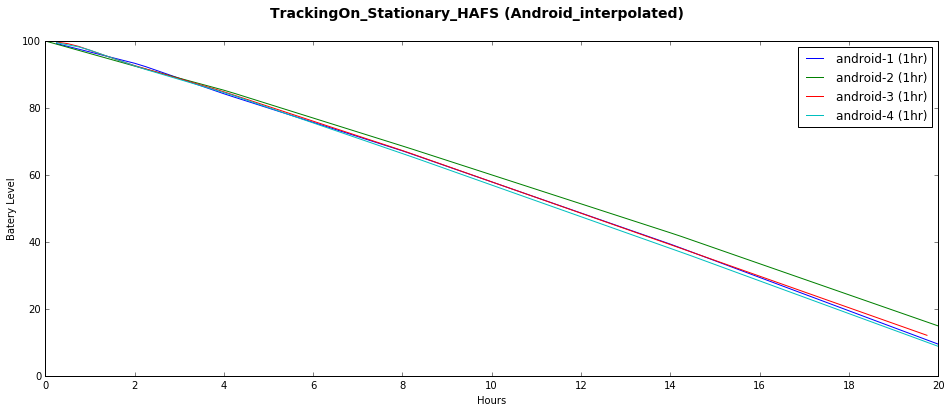

In [28]:
#Android: With interplation on battery data 
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d

ifig.suptitle(title + '(Android_interpolated)', fontsize=14, fontweight='bold')

for i, df in enumerate(android_battery_interp_df_list):
    print "About to plot %d" % i
    df['hr'] = (df.ts-android_start_ts)/3600.0
    df.plot(x='hr', y='battery_level_pct', ax=iaxes, xlim=(0, 20), label="android-%s (1hr)" % (i+1))
    iaxes.set_xlabel('Hours')
    iaxes.set_ylabel('Batery Level')
    plt.xticks(np.arange(0, 22, 2))

#ifig.savefig('interp_Apr_2-3_Android.png') 
total = []
from scipy import stats
for i, df in enumerate(android_battery_interp_df_list):
    notnull = df.battery_level_pct.notnull()
    slope, intercept, r_value, p_value, std_err = stats.linregress(df.hr[notnull], df.battery_level_pct[notnull])
    print "android %d: " % i  + "slope="+str(slope) + " std_err="+str(std_err)
    total.append(slope)
    

print sum(total)/4 
np.std(total)

In [ ]:
#Android: With interplation on battery data 
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d

ifig.suptitle(title + '(Android_overlaid)', fontsize=14, fontweight='bold')

for i, df in enumerate(android_battery_interp_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', ax=iaxes, xlim=(0, max(df.hr)), label="Android-%s (1hr)" % (i+1), legend=True)


for i, df in enumerate(android_battery_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=iaxes, xlim=(0, max(df.hr)), legend=False)
    iaxes.set_xlabel('Hours')
    iaxes.set_ylabel('Batery Level')
    plt.xticks(np.arange(0, max(df['hr'])+1, 2))
    #plt.xticks(np.arange(min(df.dt), max(df.dt), 1))
    
#ifig.savefig('overlaid_Apr_2-3_Android.png') 

In [ ]:
#Android 
#correlation analysis(tracking_off+stationary)
#generate list of android battery series 
android_battery_series_list = map(lambda b: b.battery_level_pct, android_battery_interp_df_list)
print np.corrcoef(android_battery_series_list)
plt.matshow(np.corrcoef(android_battery_series_list), cmap=plt.cm.gray)
plt.colorbar()

In [ ]:
#Android + iOS combined 
(fig, axes2d) = plt.subplots(ncols=1, nrows=2, sharex=True, sharey=True, figsize=(16,6))
axes = axes2d.flatten()

for i, df in enumerate(android_battery_df_list):
    print "About to plot %d" % i
    df['dt'] = df.ts.apply(ts_to_dt)
    df['hr'] = (df.ts-android_start_ts)/3600.0
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=aaxes[i], label="android.%s (1hr)" % (i+1))
    aaxes[i].set_xlabel('Hours')
    aaxes[i].set_ylabel('Batery Level')
    aaxes[i].set_xlim(left=0)


#iOS: With interplation on battery data 
for i, df in enumerate(iphone_battery_interp_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', ax=axes[0], xlim=(0, 22), label="iphone-%s (1hr)" % (i+1), legend=True)

for i, df in enumerate(iphone_battery_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=axes[0], xlim=(0, 22), legend=False)
    axes[0].set_xlabel('Hours')
    axes[0].set_ylabel('Batery Percentage Level')
    plt.xticks(np.arange(0, 22, 2.0))
    
    
#Android: With interplation on battery data 
for i, df in enumerate(android_battery_interp_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', ax=axes[1], xlim=(0, max(df.hr)), label="Android-%s (1hr)" % (i+1), legend=True)


for i, df in enumerate(android_battery_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=axes[1], xlim=(0, max(df.hr)), legend=False)
    axes[1].set_xlabel('Hours')
    axes[1].set_ylabel('Batery Percentage Level')
    plt.xticks(np.arange(0, max(df['hr'])+1, 2))